In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv("FB-stock-prices.csv")

In [ ]:
df

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268
...,...,...
246,12/23/2021,335
247,12/27/2021,346
248,12/28/2021,346
249,12/29/2021,343


In [ ]:
df.head(5)

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268


In [ ]:
df.dtypes

,0
Date,object
Price,int64


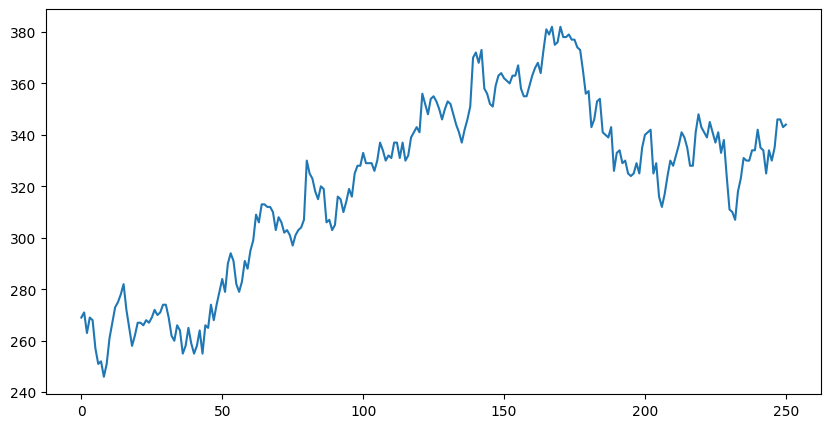

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Price'])
plt.show()

In [ ]:
df.count()

,0
Date,251
Price,251


Pre-Processing

In [ ]:
from sklearn.preprocessing import StandardScaler
std =StandardScaler()
scaled=std.fit_transform(df[['Price']].values) #We can change the 2 d array to 1d by adding an extra [] brackt.
scaled.shape

(251, 1)

In [ ]:
#train test split
total_size = len(df)
test_size = 50
train_size = total_size - test_size

In [ ]:
print(train_size)
print(test_size)

201
50


In [ ]:
#splitting
train = scaled[:train_size]
test = scaled[train_size:]

In [ ]:
print(train)

[[-1.49673154]
 [-1.4393189 ]
 [-1.66896946]
 [-1.49673154]
 [-1.52543786]
 [-1.84120738]
 [-2.01344531]
 [-1.98473899]
 [-2.15697691]
 [-2.01344531]
 [-1.7263821 ]
 [-1.55414418]
 [-1.38190626]
 [-1.32449362]
 [-1.23837465]
 [-1.12354937]
 [-1.41061258]
 [-1.61155682]
 [-1.81250106]
 [-1.69767578]
 [-1.55414418]
 [-1.55414418]
 [-1.5828505 ]
 [-1.52543786]
 [-1.55414418]
 [-1.49673154]
 [-1.41061258]
 [-1.46802522]
 [-1.4393189 ]
 [-1.35319994]
 [-1.35319994]
 [-1.49673154]
 [-1.69767578]
 [-1.75508842]
 [-1.5828505 ]
 [-1.64026314]
 [-1.89862003]
 [-1.81250106]
 [-1.61155682]
 [-1.78379474]
 [-1.89862003]
 [-1.81250106]
 [-1.64026314]
 [-1.89862003]
 [-1.5828505 ]
 [-1.61155682]
 [-1.35319994]
 [-1.52543786]
 [-1.35319994]
 [-1.20966833]
 [-1.06613673]
 [-1.20966833]
 [-0.89389881]
 [-0.77907353]
 [-0.86519249]
 [-1.12354937]
 [-1.20966833]
 [-1.09484305]
 [-0.86519249]
 [-0.95131145]
 [-0.75036721]
 [-0.63554192]
 [-0.34847872]
 [-0.43459768]
 [-0.23365344]
 [-0.23365344]
 [-0.26235

In [ ]:
train.shape

(201, 1)

In [ ]:
test.shape

(50, 1)

In [ ]:
def create_rnn_dataset(data , lookback = 1):
  data_x = []
  data_y = []
  for i in range(len(data)-lookback-1):
    a= data[i:(i+lookback),0]
    data_x.append(a)
    data_y.append(data[i+lookback,0])
  return numpy.array(data_x),numpy.array(data_y)

In [ ]:
lookback = 25
train_x,train_y = create_rnn_dataset(train,lookback)
test_x,test_y = create_rnn_dataset(test,lookback)

In [ ]:
train_x.shape

(175, 25)

In [ ]:
train_x = np.reshape(train_x,(train_x.shape[0],1,train_x.shape[1]))


In [ ]:
train_x.shape

(175, 1, 25)

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
import tensorflow as tf


In [ ]:
price_model = Sequential()
price_model.add(SimpleRNN(32,input_shape=(1,lookback)))
price_model.add(Dense(1))
price_model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
price_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
price_model.fit(train_x,train_y,epochs=5,batch_size=5,verbose=1)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3080 - mse: 0.3080
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0827 - mse: 0.0827
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0623 - mse: 0.0623
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0499 - mse: 0.0499
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0614 - mse: 0.0614


Testing

In [ ]:
test_x = np.reshape(test_x,(test_x.shape[0],1,test_x.shape[1]))


In [ ]:
price_model.evaluate(test_x ,test_y , verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.0935 - mse: 0.0935


[0.09350558370351791, 0.09350558370351791]

In [ ]:
prediction=price_model.predict(test_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


In [ ]:
prediction

array([[ 0.5073142 ],
       [ 0.60055304],
       [ 0.44179732],
       [ 0.47935522],
       [ 0.34193987],
       [ 0.154746  ],
       [-0.15788268],
       [-0.35003537],
       [-0.09048045],
       [-0.10850622],
       [ 0.12021714],
       [ 0.17819819],
       [ 0.31765965],
       [ 0.3081435 ],
       [ 0.4316159 ],
       [ 0.56289357],
       [ 0.51347804],
       [ 0.4303417 ],
       [ 0.16383915],
       [ 0.1210205 ],
       [-0.05704118],
       [ 0.1106681 ],
       [ 0.22148232],
       [ 0.5726943 ]], dtype=float32)

transforming the StandardScaler back to non-normalized form

In [ ]:
predicted_valuess = std.inverse_transform(prediction)
print(predicted_valuess)

[[338.812  ]
 [342.06003]
 [336.5297 ]
 [337.83804]
 [333.0511 ]
 [326.5301 ]
 [315.63953]
 [308.94577]
 [317.98752]
 [317.35956]
 [325.32727]
 [327.34708]
 [332.2053 ]
 [331.87378]
 [336.17502]
 [340.74814]
 [339.02673]
 [336.1306 ]
 [326.84686]
 [325.35526]
 [319.15237]
 [324.99463]
 [328.8549 ]
 [341.08954]]


In [ ]:
df.tail(5)

,Date,Price
246,12/23/2021,335
247,12/27/2021,346
248,12/28/2021,346
249,12/29/2021,343
250,12/30/2021,344


In [ ]:
df.max()

,0
Date,9/9/2021
Price,382


In [ ]:
df.min()

,0
Date,1/11/2021
Price,246


In [ ]:
#trying on our own custom values

In [ ]:
prev_prices = np.array([37969, 32811, 27149, 20083, 36119, 30578, 300255, 31066, 30183, 34733, 145271, 31, 21450, 37896, 33630, 35327, 37963, 38, 31147, 26000, 69858, 31169, 70, 31360, 14444])
scaled_prices = std.transform(prev_prices.reshape(-1,1))
model_input=np.reshape(scaled_prices,(scaled_prices.shape[1],1,scaled_prices.shape[0]))
pred = price_model.predict(model_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [ ]:
stock_pred = std.inverse_transform(pred)
print(stock_pred)

[[373.02933]]


Performing Spam classication using LSTM

In [ ]:
df2 = pd.read_csv('Spam-Classification.csv')

In [ ]:
df2.head(5)

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


In [ ]:
df2.columns

Index(['CLASS', 'SMS'], dtype='object')

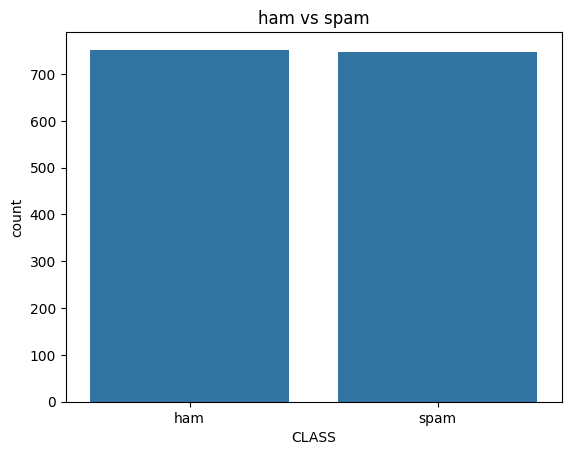

In [ ]:
import seaborn as sns
sns.countplot(
    data=df2,
    x="CLASS"
)
plt.title("ham vs spam")
plt.show()

Final using LSTM

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [ ]:

corpus=[]

for message in df2["SMS"]:


    message=re.sub("[^a-zA-Z]"," ",message)

    message=message.lower()


    message=message.split()


    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]

    message=" ".join(message)


    corpus.append(message)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer


data = pd.read_csv("Spam-Classification.csv")

encoder = LabelEncoder()
data['CLASS'] = encoder.fit_transform(data['CLASS'])


texts = data['SMS'].values
labels = data['CLASS'].values


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


max_len = 100
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")



Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


30/30 - 10s - 322ms/step - accuracy: 0.7052 - loss: 0.5487 - val_accuracy: 0.8583 - val_loss: 0.3778
Epoch 2/5
30/30 - 2s - 72ms/step - accuracy: 0.9323 - loss: 0.2154 - val_accuracy: 0.9500 - val_loss: 0.1539
Epoch 3/5
30/30 - 2s - 62ms/step - accuracy: 0.9802 - loss: 0.0771 - val_accuracy: 0.9583 - val_loss: 0.1099
Epoch 4/5
30/30 - 4s - 132ms/step - accuracy: 0.9958 - loss: 0.0325 - val_accuracy: 0.9625 - val_loss: 0.1180
Epoch 5/5
30/30 - 4s - 123ms/step - accuracy: 0.9979 - loss: 0.0192 - val_accuracy: 0.9583 - val_loss: 0.1256
Test Accuracy: 0.97
